In [1]:
import numpy as np
import pandas as pd

Exploring the dataset

In [2]:
df = pd.read_csv('../input/diamonds.csv', index_col=0)
for col in df.columns:
    df.rename(columns={col:col.capitalize()}, inplace=True)   #I just like it capitalized
print(df.shape)
df.head()

(53940, 10)


,Carat,Cut,Color,Clarity,Depth,Table,Price,X,Y,Z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
Carat      53940 non-null float64
Cut        53940 non-null object
Color      53940 non-null object
Clarity    53940 non-null object
Depth      53940 non-null float64
Table      53940 non-null float64
Price      53940 non-null int64
X          53940 non-null float64
Y          53940 non-null float64
Z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
df.describe()

,Carat,Depth,Table,Price,X,Y,Z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


X, Y and Z have 0 values which is impossible since they are lengths

In [5]:
df[['X','Y','Z']] = df[['X','Y','Z']].replace(0,np.NaN)

In [6]:
df.isnull().sum()

Carat       0
Cut         0
Color       0
Clarity     0
Depth       0
Table       0
Price       0
X           8
Y           7
Z          20
dtype: int64

only a small number are actually nan so they will be removed

In [7]:
df.dropna(inplace=True)
df.shape

(53920, 10)

Now to vizualize

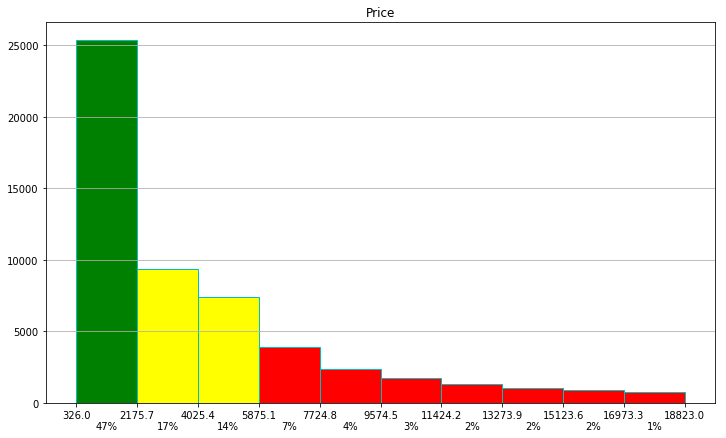

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=(12,7))
counts, bins, patches = ax.hist(df["Price"], edgecolor='c', fill=True)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Change the colors of the quartiles
twentyfifth, seventyfifth = np.percentile(df["Price"], [25, 75])
for patch, MyBin in zip(patches, bins):
    if MyBin < twentyfifth:
        patch.set_facecolor('green')
    elif MyBin > seventyfifth:
        patch.set_facecolor('red')
    else:
        patch.set_facecolor('yellow')
        
# Label the percentages below the x-axis        
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')
plt.title("Price")
ax.grid(axis='y')

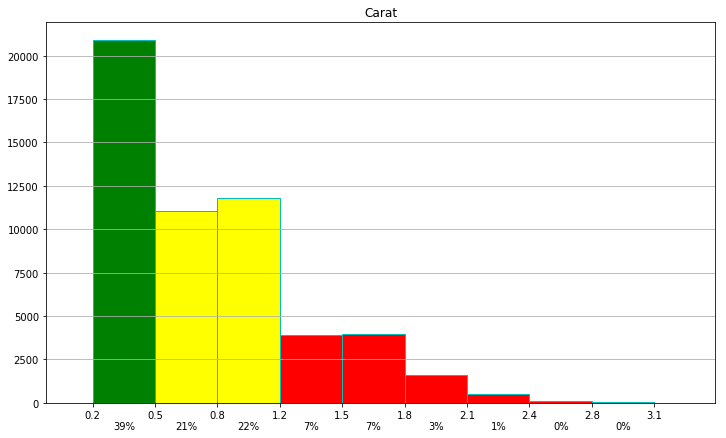

In [9]:
fig, ax = plt.subplots(figsize=(12,7))
counts, bins, patches = ax.hist(df["Carat"], bins=15, edgecolor='c')
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlim(right=3.4)
twentyfifth, seventyfifth = np.percentile(df["Carat"], [25, 75])
for patch, MyBin in zip(patches, bins):
    if MyBin < twentyfifth:
        patch.set_facecolor('green')
    elif MyBin > seventyfifth:
        patch.set_facecolor('red')
    else:
        patch.set_facecolor('yellow')

bin_centers = 0.5 * np.diff(bins[:10]) + bins[:9]
for count, x in zip(counts, bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')
plt.title("Carat")
ax.grid(axis='y')

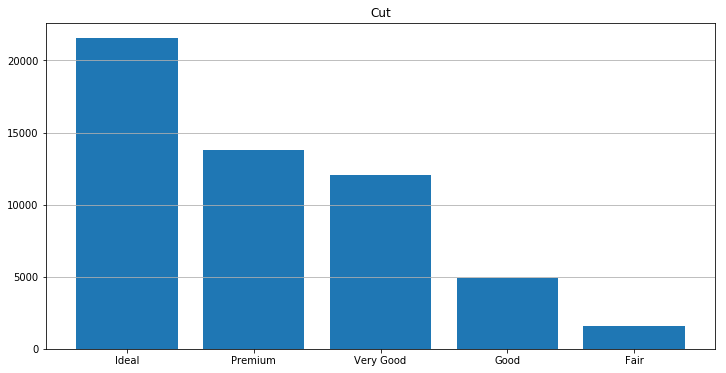

In [10]:
Cut = df[["Cut"]].stack().value_counts()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(Cut.index,Cut)
plt.title("Cut")
ax.grid(axis='y')

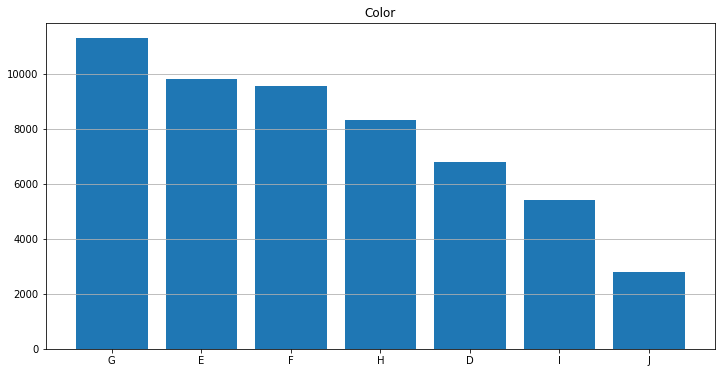

In [11]:
Colors = df[["Color"]].stack().value_counts()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(Colors.index,Colors)
plt.title("Color")
ax.grid(axis='y')

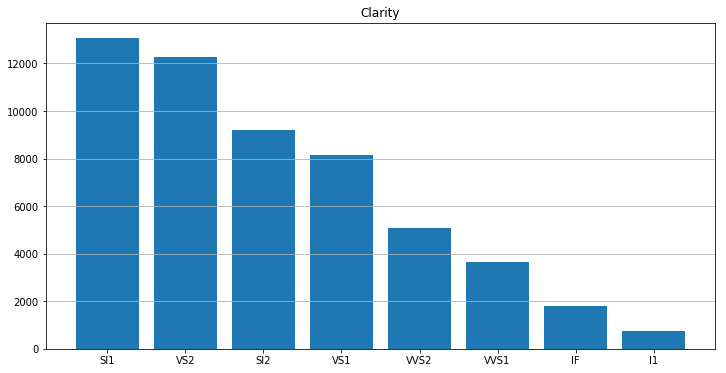

In [12]:
Clarity = df[["Clarity"]].stack().value_counts()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(Clarity.index,Clarity)
plt.title("Clarity")
ax.grid(axis='y')

(3, 10.5)

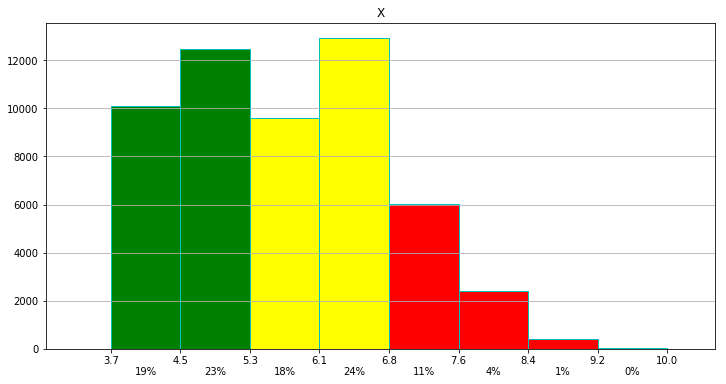

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
counts, bins, patches = ax.hist(df["X"], bins=9, edgecolor='c')
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlim(left=1.1)

# Change the colors of bars at the edges
twentyfifth, seventyfifth = np.percentile(df["X"], [25, 75])
for patch, MyBin in zip(patches[:-1], bins[:-1]):
    if MyBin < twentyfifth:
        patch.set_facecolor('green')
    elif MyBin > seventyfifth:
        patch.set_facecolor('red')
    else:
        patch.set_facecolor('yellow')

bin_centers = 0.5 * np.diff(bins[:-1]) + bins[:-2]
for count, x in zip(counts, bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')
plt.title("X")
ax.grid(axis='y')
plt.xlim(3, 10.5)

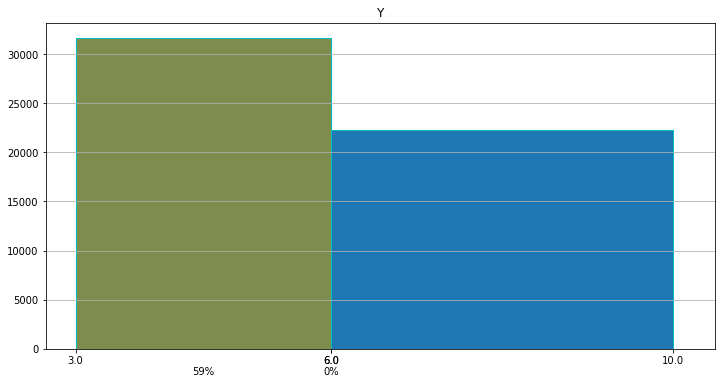

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
counts, bins, patches = ax.hist(df["Y"],bins=[3,6,6,10], edgecolor='c')
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlim(right=10.5)

patches[0].set_facecolor('#7e8c4e')

bin_centers = 0.5 * np.diff(bins[0:3]) + bins[0:2]
for count, x in zip(counts, bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')
plt.title("Y")
ax.grid(axis='y')

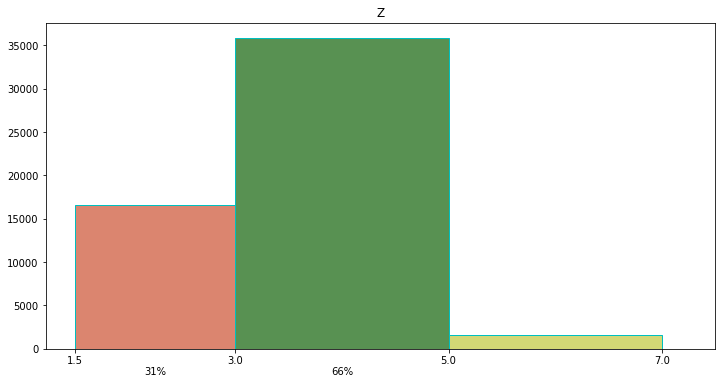

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
counts, bins, patches = ax.hist(df["Z"],bins=[1.5,3,5,7], edgecolor='c')
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlim(right=7.5)

patches[0].set_facecolor('#db856f')
patches[1].set_facecolor('#589152')
patches[2].set_facecolor('#d3d875')

bin_centers = 0.5 * np.diff(bins[0:3]) + bins[0:2]
for count, x in zip(counts, bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')
plt.title("Z")
ax.grid(axis='Z')

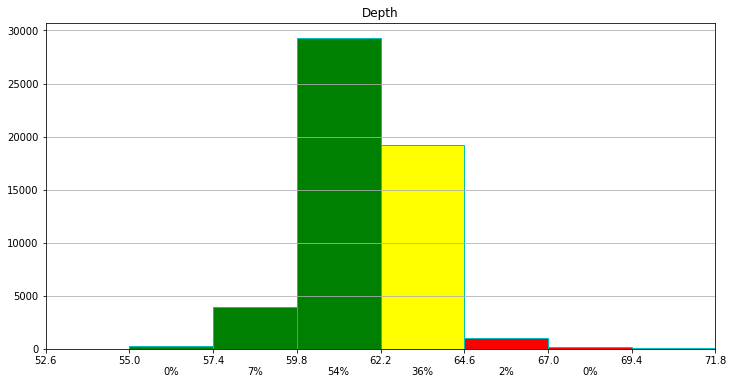

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
counts, bins, patches = ax.hist(df["Depth"], edgecolor='c', bins=15)
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlim(52.6, 71.8)

# Change the colors of bars at the edges
twentyfifth, seventyfifth = np.percentile(df["Depth"], [25, 75])
for patch, MyBin in zip(patches[5:11], bins[5:11]):
    if MyBin < twentyfifth:
        patch.set_facecolor('green')
    elif MyBin > seventyfifth:
        patch.set_facecolor('red')
    else:
        patch.set_facecolor('yellow')

bin_centers = 0.5 * np.diff(bins[5:12]) + bins[5:11]
for count, x in zip(counts[5:11], bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')
plt.title("Depth")
ax.grid(axis='y')

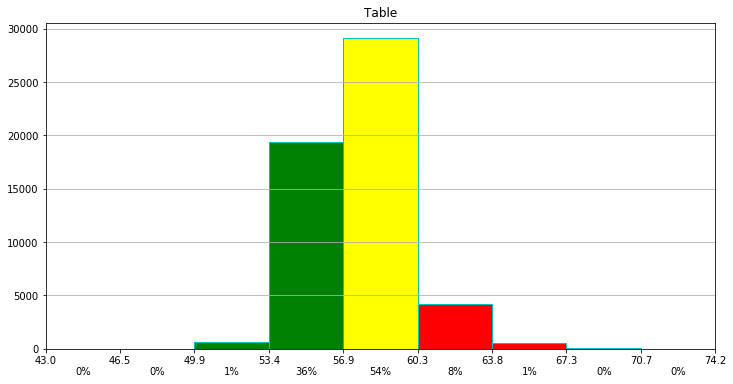

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
counts, bins, patches = ax.hist(df["Table"], edgecolor='c', bins=15)
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax.set_xlim(43.0,74.2)

# Change the colors of bars at the edges
twentyfifth, seventyfifth = np.percentile(df["Table"], [25, 75])
for patch, MyBin in zip(patches[:9], bins[:9]):
    if MyBin < twentyfifth:
        patch.set_facecolor('green')
    elif MyBin > seventyfifth:
        patch.set_facecolor('red')
    else:
        patch.set_facecolor('yellow')

bin_centers = 0.5 * np.diff(bins[:10]) + bins[:9]
for count, x in zip(counts, bin_centers):
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')
plt.title("Table")
ax.grid(axis='y')


**It seems Carat is highly corelated with the price**


Text(0, 0.5, 'Price')

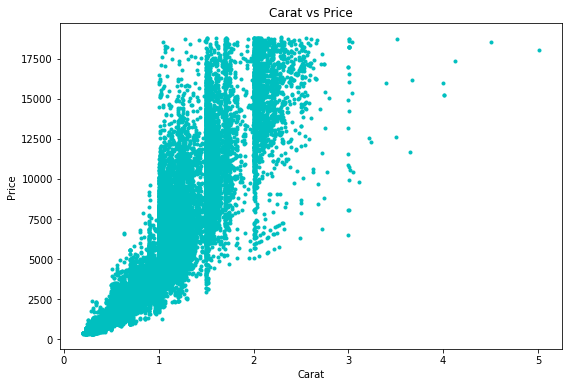

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df["Carat"], df["Price"], marker='.', c='c')
plt.title("Carat vs Price")
plt.xlabel('Carat')
plt.ylabel('Price')

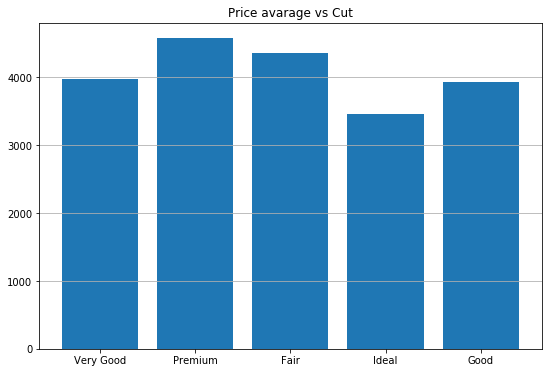

In [19]:
Price = df[["Price", "Cut"]]
Labels = set(df["Cut"])
Values = [Price[df["Cut"] == i].mean().values.item() for i in Labels]
fig, ax = plt.subplots(figsize=(9,6))
Labels = list(Labels)
ax.bar(Labels,Values)
plt.title("Price avarage vs Cut")
ax.grid(axis='y')

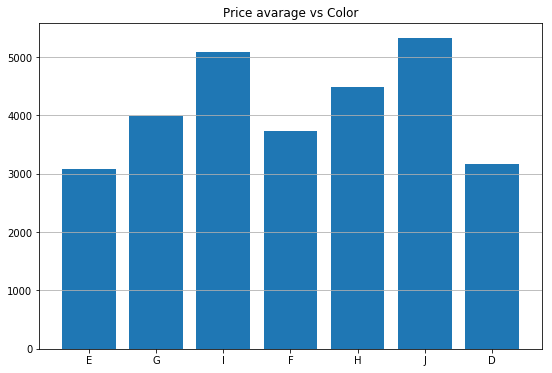

In [20]:
Price = df[["Price", "Color"]]
Labels = set(df["Color"])
Values = [Price[df["Color"] == i].mean().values.item() for i in Labels]
fig, ax = plt.subplots(figsize=(9,6))
Labels = list(Labels)
ax.bar(Labels,Values)
plt.title("Price avarage vs Color")
ax.grid(axis='y')

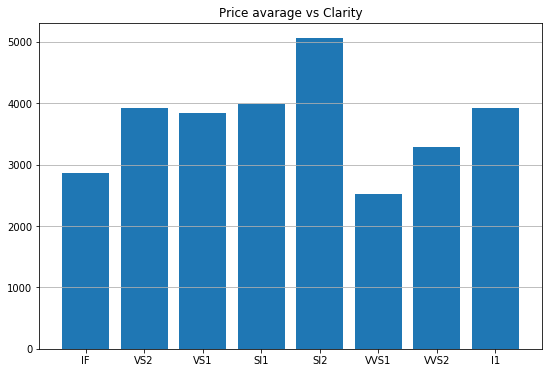

In [21]:
Price = df[["Price", "Clarity"]]
Labels = set(df["Clarity"])
Values = [Price[df["Clarity"] == i].mean().values.item() for i in Labels]
fig, ax = plt.subplots(figsize=(9,6))
Labels = list(Labels)
ax.bar(Labels,Values)
plt.title("Price avarage vs Clarity")
ax.grid(axis='y')


**It seems X is highly corelated with the price**


Text(0, 0.5, 'Price')

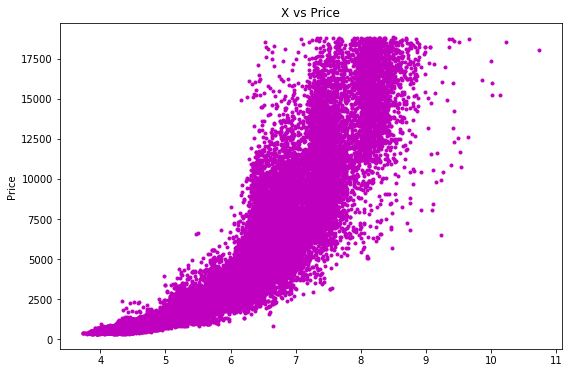

In [22]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df["X"], df["Price"], marker='.', c='m')
plt.title("X vs Price")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

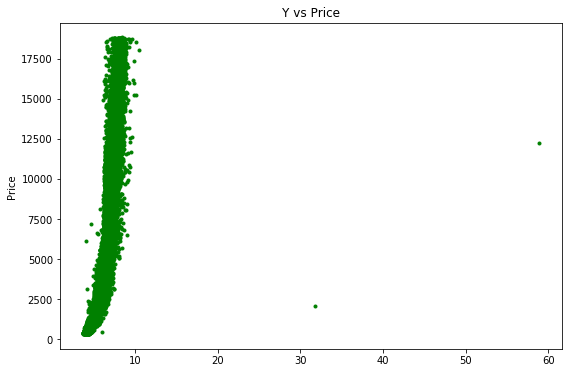

In [23]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df["Y"], df["Price"], marker='.', c='g')
plt.title("Y vs Price")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

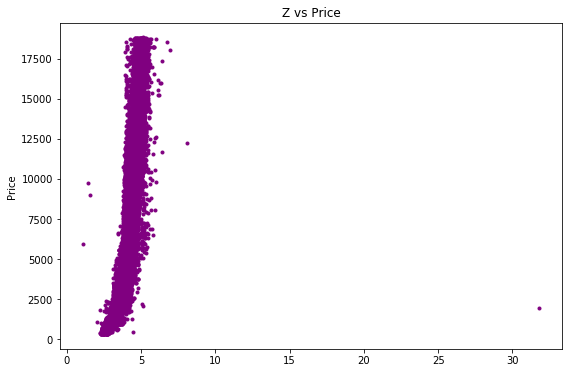

In [24]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df["Z"], df["Price"], marker='.', c='purple')
plt.title("Z vs Price")
plt.ylabel('Price')

**Depth looks kinda unrelated to the price so might get droped**

**Also it is computed using X, Y and Z**

Text(0, 0.5, 'Price')

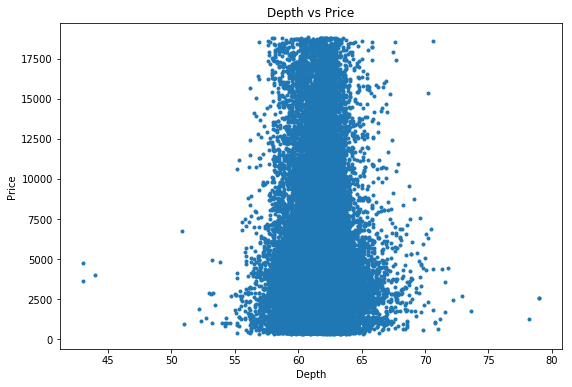

In [25]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df["Depth"], df["Price"], marker='.')
plt.title("Depth vs Price")
plt.xlabel('Depth')
plt.ylabel('Price')

**Table looks highly unrelated to the price so it will be droped**

Text(0, 0.5, 'Price')

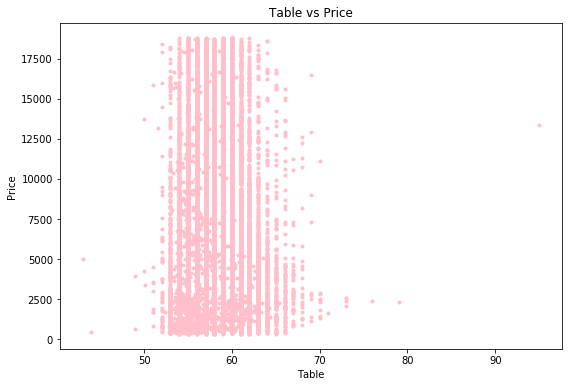

In [26]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df["Table"], df["Price"], marker='.', c= 'pink')
plt.title("Table vs Price")
plt.xlabel('Table')
plt.ylabel('Price')

In [27]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Modelling Helpers :
from sklearn.model_selection import train_test_split

#preprocessing :
from sklearn.preprocessing import OrdinalEncoder

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_error, r2_score

**strings need to be encoded**

In [28]:
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['D','E','F','G','H','I','J']
quality_categories = ['I3', 'I2', 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF', 'FL']

x = df.copy()
x[["Cut", "Color", "Clarity"]] =  OrdinalEncoder([cut_categories, color_categories, quality_categories]).fit_transform(x[["Cut", "Color", "Clarity"]])
y = x.pop('Price')
x.drop('Table', axis = 1, inplace = True)   
xNoDep = x.copy()
xNoDep.drop('Depth', axis = 1, inplace = True)     #Depth improved KNN only
x.head()

,Carat,Cut,Color,Clarity,Depth,X,Y,Z
1,0.23,4.0,1.0,3.0,61.5,3.95,3.98,2.43
2,0.21,3.0,1.0,4.0,59.8,3.89,3.84,2.31
3,0.23,1.0,1.0,6.0,56.9,4.05,4.07,2.31
4,0.29,3.0,5.0,5.0,62.4,4.20,4.23,2.63
5,0.31,1.0,6.0,3.0,63.3,4.34,4.35,2.75


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 37)
xNoD_train, xNoD_test, yNoD_train, yNoD_test = train_test_split(xNoDep, y, test_size = 0.3, random_state = 37)

In [30]:
lin_regressor = LinearRegression(normalize=True)
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
rfr_regressor = RandomForestRegressor(random_state = 666, n_estimators = 100)
Bag_regressor = BaggingRegressor(random_state = 222, n_estimators=92)
GradBost_regressor = GradientBoostingRegressor(random_state = 3356)
Ada_regressor = AdaBoostRegressor(random_state = 37)
DT_regressor = DecisionTreeRegressor(criterion='friedman_mse', random_state=12)  # criterion measures the quality of a split

**The Best accuracy is the random forest with 98 . 12 %**

In [31]:
rfr_regressor.fit(x_train,y_train)
rfr_pred = rfr_regressor.predict(x_test)
print("accuracy: "+ str(rfr_regressor.score(x_test,y_test)*100) + "%")
print("Mean squared error: {}".format(mean_squared_error(y_test,rfr_pred)))

accuracy: 98.11591403536092%
Mean squared error: 298634.0216395697


In [32]:
Bag_regressor.fit(x_train,y_train)
Bag_pred = Bag_regressor.predict(x_test)
print("accuracy: "+ str(Bag_regressor.score(x_test,y_test)*100) + "%")
print("Mean squared error: {}".format(mean_squared_error(y_test,Bag_pred)))

accuracy: 98.11389264265419%
Mean squared error: 298954.4192459696


In [33]:
GradBost_regressor.fit(x_train,y_train)
GradBost_pred = GradBost_regressor.predict(x_test)
print("accuracy: "+ str(GradBost_regressor.score(x_test,y_test)*100) + "%")
print("Mean squared error: {}".format(mean_squared_error(y_test,GradBost_pred)))

accuracy: 97.58094089597022%
Mean squared error: 383429.08040218597


In [34]:
knn_regressor.fit(xNoD_train,yNoD_train)
knn_pred = knn_regressor.predict(xNoD_test)
print("accuracy: "+ str(knn_regressor.score(xNoD_test,yNoD_test)*100) + "%")
print("Mean squared error: {}".format(mean_squared_error(yNoD_test,knn_pred)))

accuracy: 97.52390431488497%
Mean squared error: 392469.5721364985


In [35]:
DT_regressor.fit(x_train,y_train)
DT_pred = DT_regressor.predict(x_test)
print("accuracy: "+ str(DT_regressor.score(x_test,y_test)*100) + "%")
print("Mean squared error: {}".format(mean_squared_error(y_test,DT_pred)))

accuracy: 96.55970991529207%
Mean squared error: 545297.6577954995


In [36]:
Ada_regressor.fit(x_train,y_train)
Ada_pred = Ada_regressor.predict(x_test)
print("accuracy: "+ str(Ada_regressor.score(x_test,yNoD_test)*100) + "%")
print("Mean squared error: {}".format(mean_squared_error(y_test,Ada_pred)))

accuracy: 91.42928062437956%
Mean squared error: 1358488.1175928793


In [37]:
lin_regressor.fit(x_train,y_train)
lin_pred = lin_regressor.predict(x_test)
print("accuracy: "+ str(lin_regressor.score(x_test,y_test)*100) + "%")
print("Mean squared error: {}".format(mean_squared_error(y_test,lin_pred)))

accuracy: 91.0979497280443%
Mean squared error: 1411005.1894903905
